## Problem Statement- 
The company is experiencing significant difference in customer satisfaction and ratings across its product lines, despite offering a range of styles, prices, and materials and more. While some products receive high ratings, others are receiving very low or even zero ratings. This inconsistency suggests a potential issue in product design, material choice, or alignment with customer expectations, which is impacting overall brand perception and sales. Our aim is to find out where the problem is using clustering techniques and provide solutions. 

In [52]:
import pandas as pd

In [53]:
df = pd.read_excel("D://IMI//Terms//Term 4//Analytics//Data Analytics & Machine Learning//Assignment//Arghya Sir//dresses+attribute+sales (1)//Dresses_Attribute_Sales//Dresses_Attribute_Sales//Attribute DataSet.xlsx")

# Checking for missing values

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           498 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          498 non-null    object 
 6   NeckLine        497 non-null    object 
 7   SleeveLength    498 non-null    object 
 8   waiseline       413 non-null    object 
 9   Material        372 non-null    object 
 10  FabricType      234 non-null    object 
 11  Decoration      264 non-null    object 
 12  Pattern Type    391 non-null    object 
 13  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB


In [55]:
df.head(5)

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Recommendation
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,NaN,chiffon,ruffles,animal,1
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,NaN,ruffles,animal,0
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,NaN,NaN,print,0
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print,1
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot,0


# Filling the Missing Data

In [56]:
df['Price'].fillna(df['Price'].mode()[0], inplace=True)
df['Season'].fillna(df['Season'].mode()[0], inplace=True)
df['NeckLine'].fillna(df['NeckLine'].mode()[0], inplace=True)
df['SleeveLength'].fillna(df['SleeveLength'].mode()[0], inplace=True)
df['waiseline'].fillna(df['waiseline'].mode()[0], inplace=True)
df['Material'].fillna(df['Material'].mode()[0], inplace=True)
df['FabricType'].fillna(df['waiseline'].mode()[0], inplace=True)
df['Decoration'].fillna(df['Material'].mode()[0], inplace=True)
df['Pattern Type'].fillna(df['Pattern Type'].mode()[0], inplace=True)

C:\Users\Shwetlana Sinha\AppData\Local\Temp\ipykernel_30828\9123008.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(df['Price'].mode()[0], inplace=True)
C:\Users\Shwetlana Sinha\AppData\Local\Temp\ipykernel_30828\9123008.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dress_ID        500 non-null    int64  
 1   Style           500 non-null    object 
 2   Price           500 non-null    object 
 3   Rating          500 non-null    float64
 4   Size            500 non-null    object 
 5   Season          500 non-null    object 
 6   NeckLine        500 non-null    object 
 7   SleeveLength    500 non-null    object 
 8   waiseline       500 non-null    object 
 9   Material        500 non-null    object 
 10  FabricType      500 non-null    object 
 11  Decoration      500 non-null    object 
 12  Pattern Type    500 non-null    object 
 13  Recommendation  500 non-null    int64  
dtypes: float64(1), int64(2), object(11)
memory usage: 54.8+ KB


In [58]:
df1 = df.copy()

In [59]:
df.drop('Recommendation', axis=1, inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Dress_ID      500 non-null    int64  
 1   Style         500 non-null    object 
 2   Price         500 non-null    object 
 3   Rating        500 non-null    float64
 4   Size          500 non-null    object 
 5   Season        500 non-null    object 
 6   NeckLine      500 non-null    object 
 7   SleeveLength  500 non-null    object 
 8   waiseline     500 non-null    object 
 9   Material      500 non-null    object 
 10  FabricType    500 non-null    object 
 11  Decoration    500 non-null    object 
 12  Pattern Type  500 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 50.9+ KB


In [61]:
df.head(10)

,Dress_ID,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type
0,1006032852,Sexy,Low,4.6,M,Summer,o-neck,sleevless,empire,cotton,chiffon,ruffles,animal
1,1212192089,Casual,Low,0.0,L,Summer,o-neck,Petal,natural,microfiber,natural,ruffles,animal
2,1190380701,vintage,High,0.0,L,Automn,o-neck,full,natural,polyster,natural,cotton,print
3,966005983,Brief,Average,4.6,L,Spring,o-neck,full,natural,silk,chiffon,embroidary,print
4,876339541,cute,Low,4.5,M,Summer,o-neck,butterfly,natural,chiffonfabric,chiffon,bow,dot
5,1068332458,bohemian,Low,0.0,M,Summer,v-neck,sleevless,empire,cotton,natural,cotton,print
6,1220707172,Casual,Average,0.0,XL,Summer,o-neck,full,natural,cotton,natural,cotton,solid
7,1219677488,Novelty,Average,0.0,free,Automn,o-neck,short,natural,polyster,broadcloth,lace,solid
8,1113094204,Flare,Average,0.0,free,Spring,v-neck,short,empire,cotton,broadcloth,beading,solid
9,985292672,bohemian,Low,0.0,free,Summer,v-neck,sleevless,natural,nylon,chiffon,cotton,solid


In [62]:
df1.drop('Dress_ID', axis=1, inplace=True)
df1.drop('Recommendation', axis=1, inplace=True)

# Encoding Categorical Columns

In [63]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Style'] = le.fit_transform(df['Style'])
df1['Price'] = le.fit_transform(df['Price'])

df1['Size'] = le.fit_transform(df['Size'])

df1['Season'] = le.fit_transform(df['Season'])
df1['NeckLine'] = le.fit_transform(df['NeckLine'])
df1['waiseline'] = le.fit_transform(df['waiseline'])
df1['Material'] = le.fit_transform(df['Material'])

df1['FabricType'] = le.fit_transform(df['FabricType'])
df1['Decoration'] = le.fit_transform(df['Decoration'])
df1['Pattern Type'] = le.fit_transform(df['Pattern Type'])
df1['SleeveLength'] = le.fit_transform(df['SleeveLength'])

In [64]:
df1.head(5)

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type
0,5,2,4.6,1,3,7,10,1,3,3,21,0
1,1,2,0.0,0,3,7,0,2,8,11,21,0
2,11,1,0.0,0,0,7,4,2,15,11,6,10
3,0,0,4.6,0,2,7,4,2,18,3,9,10
4,7,2,4.5,1,3,7,1,2,2,3,3,2


# KMeans Clustering

C:\Users\Shwetlana Sinha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Shwetlana Sinha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Shwetlana Sinha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Shwetlana Sinha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

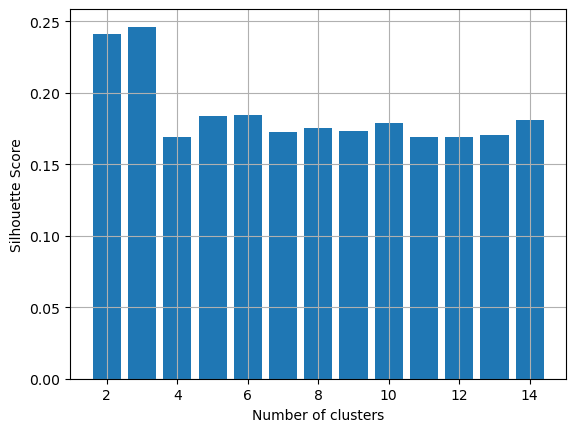

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = []

# Loop through cluster numbers from 2 to 14
for n_cluster in range(2, 15):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)  # Set random_state for reproducibility
    cluster_labels = kmeans.fit_predict(df1)  # Predict clusters
    silhouette_avg = silhouette_score(df1, cluster_labels)  # Calculate silhouette score
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores for each number of clusters
k = range(2, 15)
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize=10)
plt.ylabel('Silhouette Score', fontsize=10)
plt.grid()
plt.show()

In [66]:
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit_predict(df1)

C:\Users\Shwetlana Sinha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [67]:
kmeans.labels_

array([1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 1, 1, 2, 0, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0, 0, 2,
       1, 1, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0,
       2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 2, 2,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0,
       1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,

# Checking Accuracy

In [68]:
#Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
kmeans.inertia_

51646.529939253

In [69]:
#Coordinates of cluster centers. 
kmeans.cluster_centers_

array([[ 4.3655914 ,  1.59856631,  3.49569892,  2.03584229,  2.73476703,
         9.        ,  7.82437276,  1.78136201,  3.01433692,  9.        ,
         6.98924731,  9.7562724 ],
       [ 3.62921348,  1.25842697,  3.91123596,  1.94382022,  3.13483146,
         8.94382022,  8.34831461,  1.76404494,  8.79775281,  7.65168539,
        21.30337079, 10.01123596],
       [ 4.11363636,  1.56818182,  3.34015152,  1.95454545,  3.23484848,
         9.18939394,  8.18939394,  1.78030303, 15.28787879,  8.97727273,
         7.14393939,  9.53030303]])

In [70]:
#Number of features seen during fit.
kmeans.n_features_in_

12

In [71]:
df1["Cluster"] = clusters

In [72]:
df1.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Cluster
0,5,2,4.6,1,3,7,10,1,3,3,21,0,1
1,1,2,0.0,0,3,7,0,2,8,11,21,0,1
2,11,1,0.0,0,0,7,4,2,15,11,6,10,2
3,0,0,4.6,0,2,7,4,2,18,3,9,10,2
4,7,2,4.5,1,3,7,1,2,2,3,3,2,0


In [73]:
df1.columns

Index(['Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration',
       'Pattern Type', 'Cluster'],
      dtype='object')

# Predicting on new data

In [74]:
data = [[5,	2,	4.6, 1,	3, 7, 10, 1, 3,	3, 21, 0]]
new_test_data = pd.DataFrame(data, columns=['Style', 'Price', 'Rating', 'Size', 'Season', 'NeckLine',
       'SleeveLength', 'waiseline', 'Material', 'FabricType', 'Decoration',
       'Pattern Type'])

In [75]:
new_test_data.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type
0,5,2,4.6,1,3,7,10,1,3,3,21,0


In [76]:
kmeans.predict(new_test_data)

array([1])

In [78]:
df1.to_excel("D://IMI//Terms//Term 4//Analytics//Data Analytics & Machine Learning//Assignment//Arghya Sir//dresses+attribute+sales (1)//Dresses_Attribute_Sales//Dresses_Attribute_Sales//AttributeDataSet_KMeans_Cluster1.xlsx", index=False)

In [79]:
df2 = df1.copy()

# Agglomerative Clustering

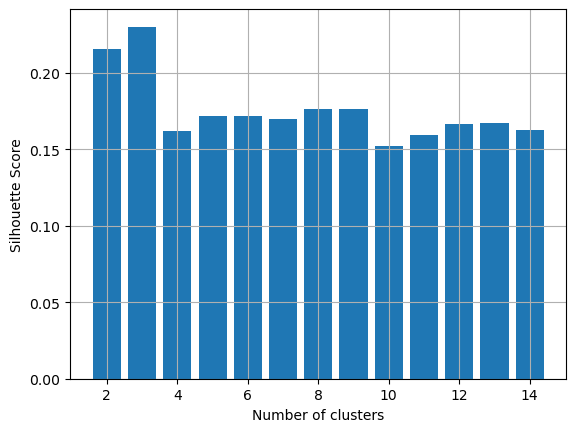

In [80]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

silhouette_scores = [] 

for n_cluster in range(2,15):
    silhouette_scores.append( 
        silhouette_score(df2, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(df2))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.grid()
plt.show()

In [81]:
df2.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,Cluster
0,5,2,4.6,1,3,7,10,1,3,3,21,0,1
1,1,2,0.0,0,3,7,0,2,8,11,21,0,1
2,11,1,0.0,0,0,7,4,2,15,11,6,10,2
3,0,0,4.6,0,2,7,4,2,18,3,9,10,2
4,7,2,4.5,1,3,7,1,2,2,3,3,2,0


In [82]:
df2.drop("Cluster", axis=1, inplace=True)

In [83]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, linkage = "ward")
cluster = hc.fit_predict(df2)
df2["AG_Cluster"] = cluster

In [84]:
df2.head()

,Style,Price,Rating,Size,Season,NeckLine,SleeveLength,waiseline,Material,FabricType,Decoration,Pattern Type,AG_Cluster
0,5,2,4.6,1,3,7,10,1,3,3,21,0,1
1,1,2,0.0,0,3,7,0,2,8,11,21,0,1
2,11,1,0.0,0,0,7,4,2,15,11,6,10,2
3,0,0,4.6,0,2,7,4,2,18,3,9,10,2
4,7,2,4.5,1,3,7,1,2,2,3,3,2,0


In [86]:
silhouette_score(df2, AgglomerativeClustering(n_clusters = 3).fit_predict(df2))

0.24224560880037682

In [ ]:
# Save the combined DataFrame to a CSV file
df2.to_excel("D://IMI//Terms//Term 4//Analytics//Data Analytics & Machine Learning//Assignment//Arghya Sir//dresses+attribute+sales (1)//Dresses_Attribute_Sales//Dresses_Attribute_Sales//AttributeDataSet_AGG_cluster.xlsx", index=False)

# Interpretation

As seen in cluster 1, cotton is a highly preferred material for summer due to its breathability and comfort. The combination of cotton with chiffon, which adds a light and airy texture, is well-suited for summer wear. This cluster likely meets customer expectations for summer apparel.

Cluster 0 and 2 might have a potential mismatch as the use of polyester combined with chiffon may not be ideal for winter clothing as chiffon is known for its lightweight and sheer properties which is more commonly associated with summer or formal wear rather than winter clothing. Similarly "worsted" may not be the best match for summer wear

# Solutions

The fabric choice of cluster 0 and 2 should be adjusted to improve customer satisfaction and match seasonal expectations. They should aslo market the comfort and suitability of cluster 1 products in summer as per needs. 

# Business Implications

Improve Product Quality: Enhance products with low ratings by addressing quality and design issues to boost customer satisfaction and reduce returns.

Optimize Product Line: Focus on promoting high-rated products and consider redesigning or phasing out underperforming items to better align with market demand and improve sales.